# Comparativa: Búsqueda Lineal vs (Ordenamiento + Búsqueda Binaria)

## Repaso de los tiempos

* Búsqueda Lineal: $O(n)$
* Ordenamiento: $O(n*log(n))$
* Búsqueda Binaria: $O(log(n))$

In [1]:
import random
import time

import matplotlib.pyplot as plt

In [2]:
plt.rcParams['figure.dpi'] = 190

**Implementación de Búsqueda Lineal**

In [3]:
def busq_lineal(docs, buscado):
    for i in range(len(docs)):
        if buscado == docs[i]:
            return i
    return -1

**Implementación de Búsqueda Binaria**

In [4]:
def busq_bin_rec(docs, buscado, inicio, fin):
    if inicio > fin: return -1

    medio = (inicio + fin) // 2

    if docs[medio] == buscado:
        return medio
    elif docs[medio] > buscado:
        return busq_bin_rec(docs, buscado, inicio, medio - 1)
    else:
        return busq_bin_rec(docs, buscado, medio + 1, fin)
    
def busq_binaria(docs, buscado):
    return busq_bin_rec(docs, buscado, 0, len(docs) - 1)

## Qué pasa si hacemos más de una búsqueda (k búsquedas)?

**Genero una lista de 300.000 padrones**

In [5]:
EMPADRONADOS = 300000
docs = list(range(EMPADRONADOS)) # Creo padrones
random.shuffle(docs) # Mezclo padrones

**Cuento los tiempos que toma hacer k Búsquedas Lineales (variando k de 0 a 100 con pasos de a 10)**

In [6]:
cantidad_de_busquedas = range(0, 100, 10)

In [7]:
tiempos_lineal = []
for K in cantidad_de_busquedas:
    start = time.time()
    for i in range(K):
        buscado = random.randint(0, EMPADRONADOS - 1)
        j = busq_lineal(docs, buscado)
    end = time.time()
    tiempos_lineal.append(end - start)

**Cuento los tiempos que toma ordenar el arreglo y luego hacer k Búsquedas Binarias (variando k de 0 a 100 con pasos de a 10)**

In [8]:
tiempos_binaria = []
start = time.time()
docs_sorted = sorted(docs)
end = time.time()
offset = end - start

for K in cantidad_de_busquedas:
    start = time.time()
    for i in range(K):
        buscado = random.randint(0, EMPADRONADOS - 1)
        j = busq_binaria(docs_sorted, buscado)
    end = time.time()
    tiempos_binaria.append(offset + end - start) 

## Gráfico comparativo!

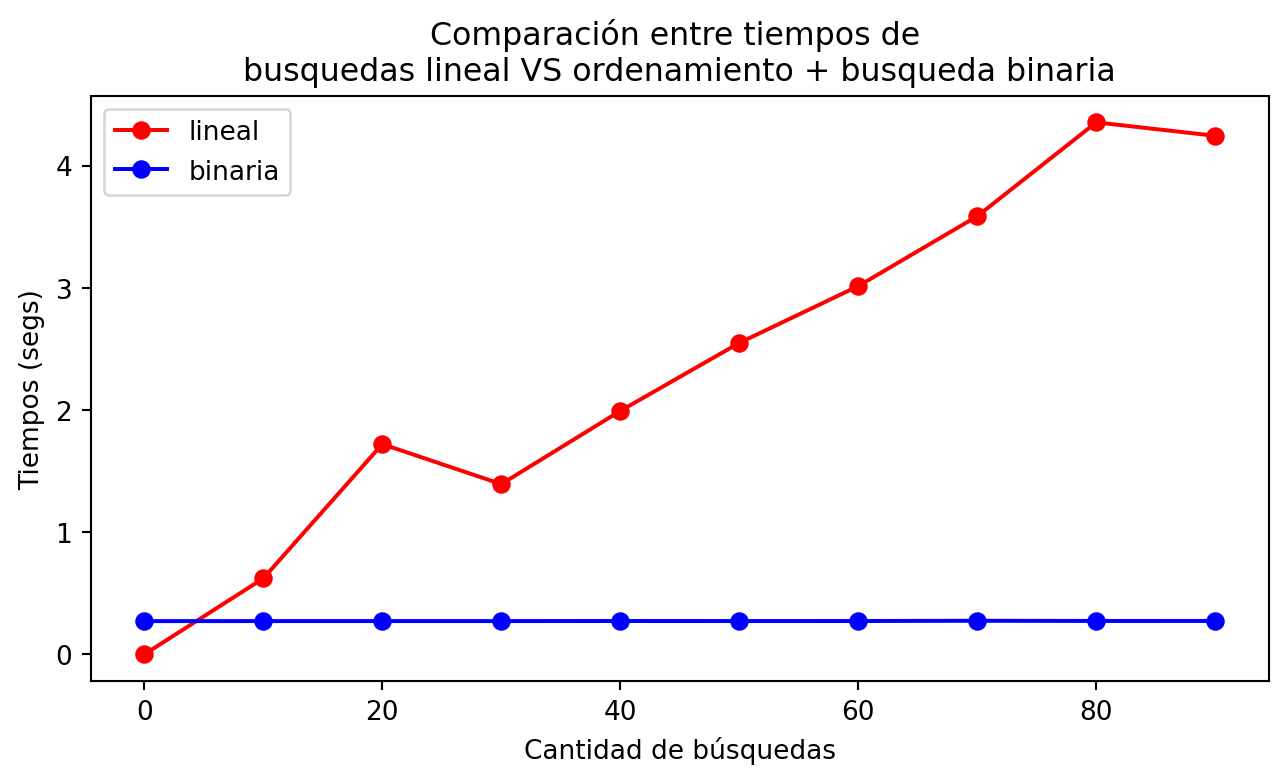

In [9]:
plt.figure(figsize=(8, 4))
plt.title("Comparación entre tiempos de \nbusquedas lineal VS ordenamiento + busqueda binaria")
plt.ylabel("Tiempos (segs)")
plt.xlabel("Cantidad de búsquedas")
plt.plot(cantidad_de_busquedas, tiempos_lineal, 'r-o')
plt.plot(cantidad_de_busquedas, tiempos_binaria, 'b-o')
plt.legend(['lineal','binaria'])
plt.show()